In [133]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

insurance_data = []

with open('insurance.csv', mode='r') as file:
    csv_reader = csv.DictReader(file)
    for row in csv_reader:
        insurance_data.append(row)

#Converted "smoker" yes/no to 1/0
for data in insurance_data:
    if data["smoker"] == "yes":
        data["smoker"] = 1
    else:
        data["smoker"] = 0

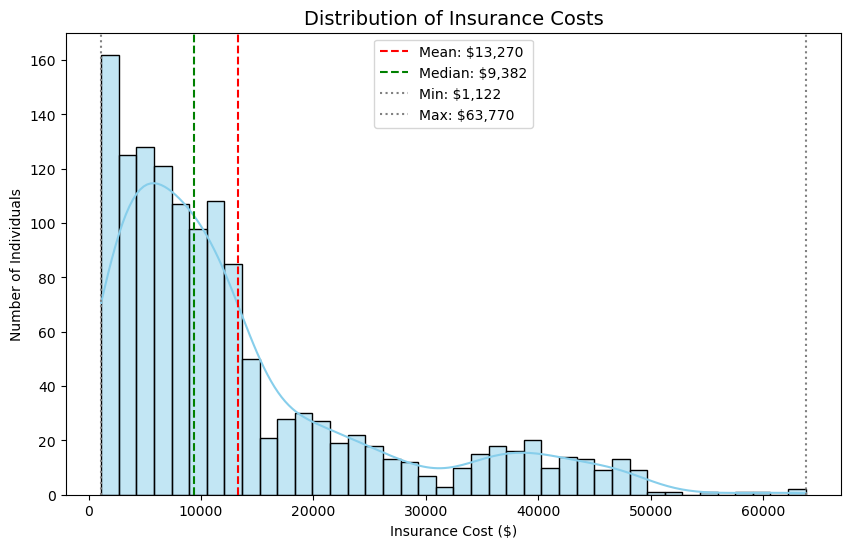

In [134]:
#Exploratory: What is the average, median, and range of insurance costs across all individuals?




# Basic stats
average_cost = df['charges'].mean()
median_cost = df['charges'].median()
min_cost = df['charges'].min()
max_cost = df['charges'].max()


# Plot histogram
plt.figure(figsize=(10,6))
sns.histplot(df['charges'], bins=40, kde=True, color='skyblue')

# Add lines for mean, median, and range
plt.axvline(average_cost, color='red', linestyle='--', label=f'Mean: ${average_cost:,.0f}')
plt.axvline(median_cost, color='green', linestyle='--', label=f'Median: ${median_cost:,.0f}')
plt.axvline(min_cost, color='gray', linestyle=':', label=f'Min: ${min_cost:,.0f}')
plt.axvline(max_cost, color='gray', linestyle=':', label=f'Max: ${max_cost:,.0f}')

# Labels and title
plt.title('Distribution of Insurance Costs', fontsize=14)
plt.xlabel('Insurance Cost ($)')
plt.ylabel('Number of Individuals')
plt.legend()
plt.show()

Average insurance cost of females: 12569.57884383534
Average insurance cost of males: 13956.751177721886


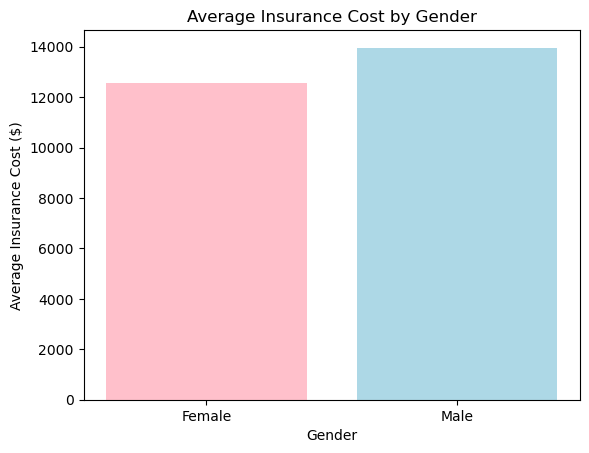

In [98]:
#Exploratory: How do average insurance costs differ by gender?
import matplotlib.pyplot as plt
#Find averages
def average_cost_by_gender(gender):
    total_cost = 0
    count = 0
    for data in insurance_data:
        if data["sex"] == gender:
            total_cost += float(data["charges"])
            count += 1
    return total_cost / count

avg_female = average_cost_by_gender("female")
avg_male = average_cost_by_gender("male")

print("Average insurance cost of females: " + str(avg_female))
print("Average insurance cost of males: " + str(avg_male))

# Prepare data for plot
genders = ["Female", "Male"]
avg_costs = [avg_female, avg_male]

# Plot
plt.bar(genders, avg_costs, color=['pink', 'lightblue'])
plt.title("Average Insurance Cost by Gender")
plt.ylabel("Average Insurance Cost ($)")
plt.xlabel("Gender")
plt.show()


Average insurance cost of a parent: 14847.39845902273
Average insurance cost of a non-parent: 12497.739052103547


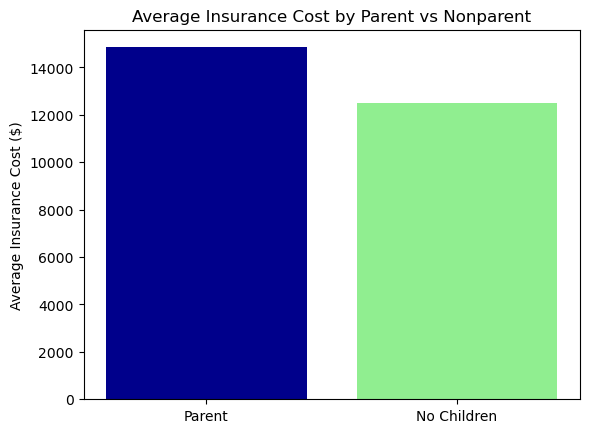

In [135]:
#Comparative Analysis: Do parents (people with children) tend to pay more or less for insurance than those without children?
# split to Parent vs nonParent


#Calculate--split data by parent vs parent
for person in insurance_data:
    if int(person["children"]) > 1:
        person["is_Parent"] = "Parent"
    else:
       person["is_Parent"] = "No Children"

#average cost of parent vs no children
def average_cost_parent(is_Parent):
    total_cost = 0
    count = 0
    for person in insurance_data:
        if person["is_Parent"] == is_Parent:
            total_cost += float(person["charges"])
            count += 1
    return total_cost / count

avg_parent = average_cost_parent("Parent")
avg_nonparent = average_cost_parent("No Children")

print("Average insurance cost of a parent: " + str(avg_parent))
print("Average insurance cost of a non-parent: " + str(avg_nonparent))

#Prepare Plot
is_Parent = ["Parent", "No Children"]
avg_costs = [avg_parent, avg_nonparent]

#Plot
plt.bar(is_Parent, avg_costs, color=['darkblue', 'lightgreen'])
plt.title("Average Insurance Cost by Parent vs Nonparent")
plt.ylabel("Average Insurance Cost ($)")
plt.show()


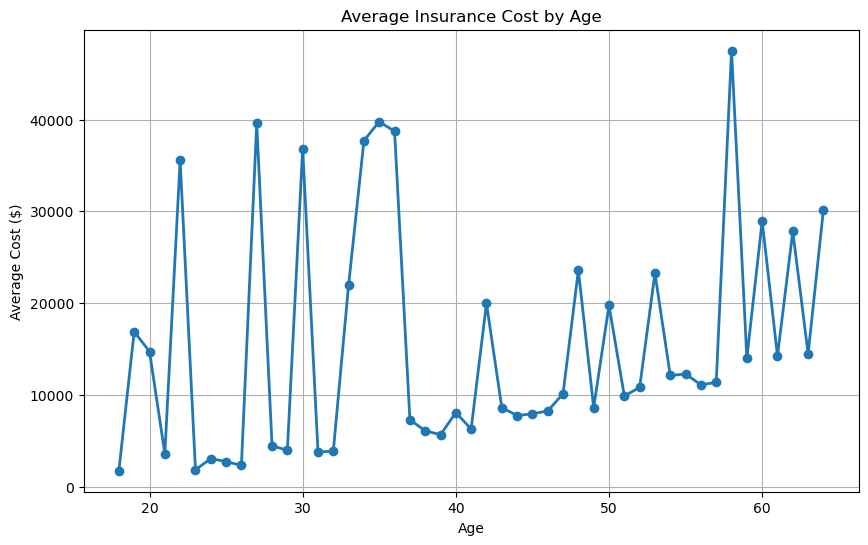

In [113]:
#How does age influence charges?

import matplotlib.pyplot as plt

#Dictionary of Ages and Costs
age_by_cost = {}
for person in insurance_data:
    age = int(person["age"])
    cost = float(person["charges"])
    if age not in age_by_cost:
        age_by_cost[age] = []
        age_by_cost[age].append(cost)

#Calculate Average Cost by Age
average_cost_by_age = {}
for age, cost in age_by_cost.items():
    average_cost_by_age[age] = sum(cost) / len(cost)

ages = sorted(average_cost_by_age.keys())
avg_costs = [average_cost_by_age[age] for age in ages]

plt.figure(figsize=(10,6))
plt.plot(ages, avg_costs, marker='o', linestyle='-', linewidth=2)
plt.title("Average Insurance Cost by Age")
plt.xlabel("Age")
plt.ylabel("Average Cost ($)")
plt.grid(True)
plt.show()


In [136]:
#Which factor has the strongest correleation with insurance charge?

#Converted "sex" male/female to 0/1
for data in insurance_data:
    if data["sex"] == "female":
        data["sex"] = 0
    else:
        data["sex"] = 1
        
# Set up lists of each factor
age = [float(i["age"]) for i in insurance_data]
sex = [float(i["sex"]) for i in insurance_data]
bmi = [float(i["bmi"]) for i in insurance_data]
children = [float(i["children"]) for i in insurance_data]
smoker = [float(i["smoker"]) for i in insurance_data]
charges = [float(i["charges"]) for i in insurance_data]

#Calculate correlation
def correlation(x, y):
    mean_x = sum(x) / len(x)
    mean_y = sum(y) / len(y)
    
    numerator = sum((a - mean_x) * (b - mean_y) for a, b in zip(x, y))
    denominator = (sum((a - mean_x)**2 for a in x) * sum((b - mean_y)**2 for b in y)) ** 0.5
    
    if denominator == 0:
        return 0
    return numerator / denominator

age_corr = correlation(age, charges)
sex_corr = correlation(sex, charges)
bmi_corr = correlation(bmi, charges)
child_corr = correlation(children, charges)
smoke_corr = correlation(smoker, charges)

#Results
print("Correlation with insurance cost:")
print("Age: " + str(age_corr))
print("Sex: " + str(sex_corr))
print("BMI: " + str(bmi_corr))
print("Children: " + str(child_corr))
print("Smoker: " + str(smoke_corr))




Correlation with insurance cost:
Age: 0.2990081933306477
Sex: 0.057292062202025366
BMI: 0.1983409688336289
Children: 0.06799822684790482
Smoker: 0.7872514304984773
